# Insurance

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### Import Data and Explore

In [2]:
ins = pd.read_csv('insurance.csv')

In [3]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [5]:
# Check for missing values
ins.isnull().sum(axis = 0)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Preprocessing and Visualization

In [6]:
# Encode categorical columns
encoder = LabelEncoder()
ins['sex'] = encoder.fit_transform(ins['sex'])
ins['smoker'] = encoder.fit_transform(ins['smoker'])
ins['region'] = encoder.fit_transform(ins['region'])

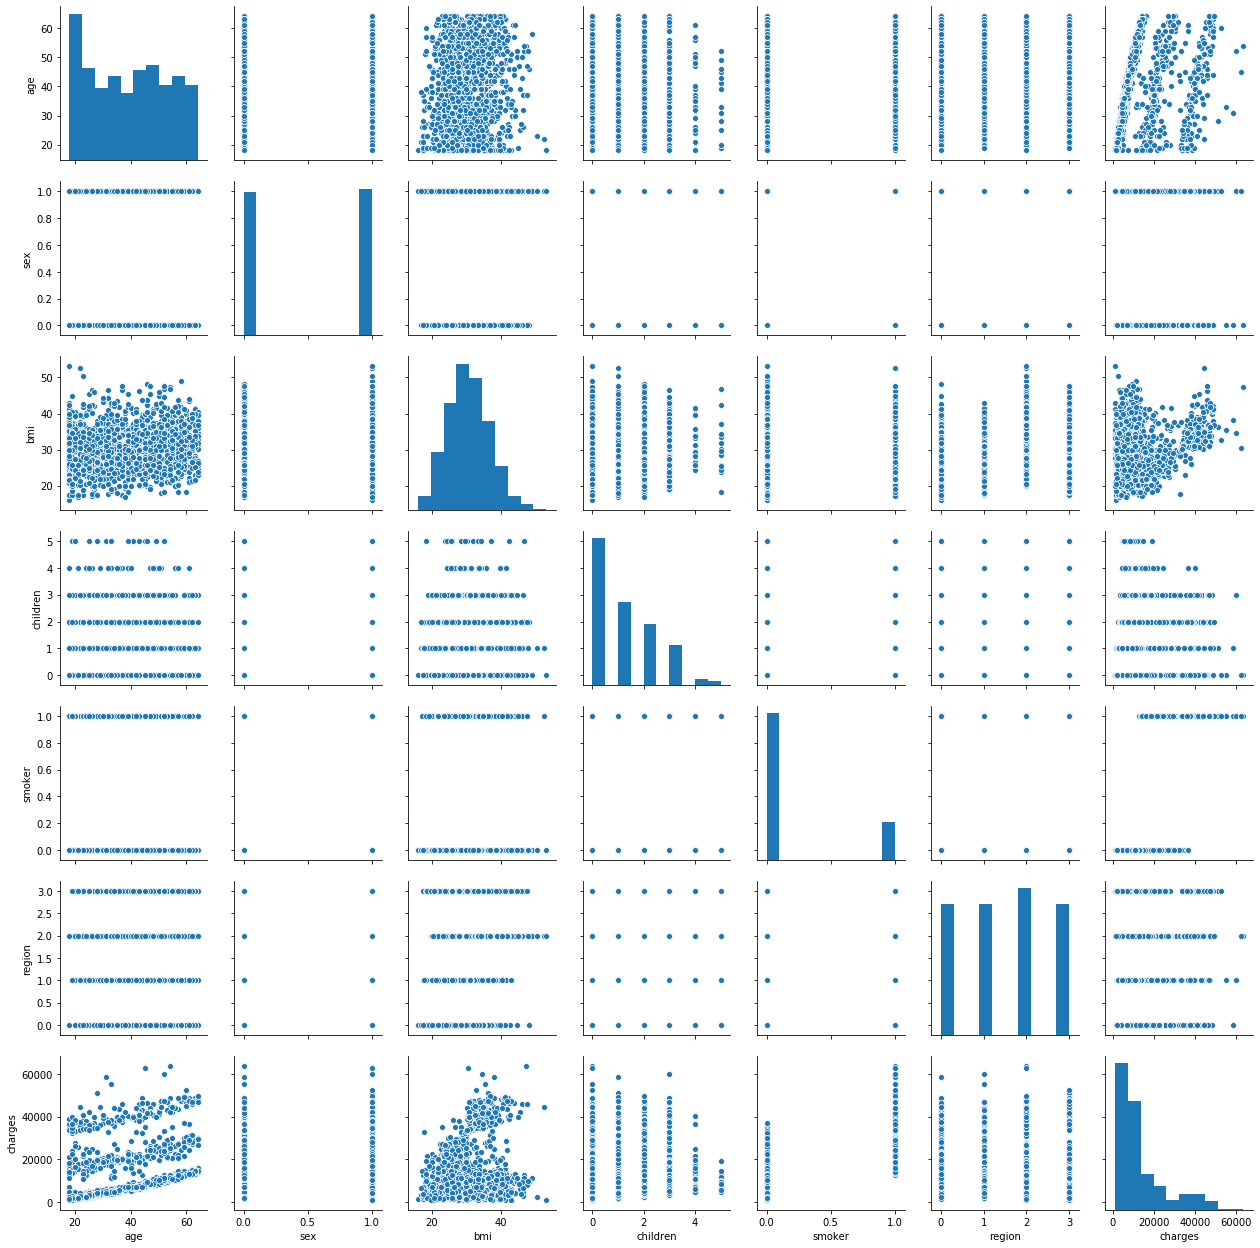

In [7]:
sns.pairplot(ins)

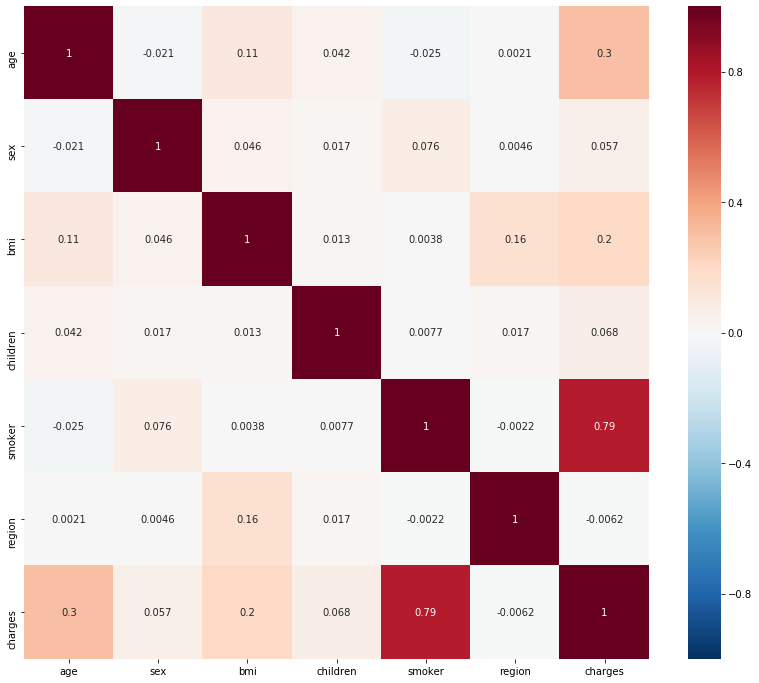

In [8]:
correlation = ins.corr()
plt.figure(figsize=(14,12))
heatmap = sns.heatmap(correlation, annot=True, linewidths=0, vmin=-1, cmap="RdBu_r")

In [9]:
feat = list(ins)
feat.remove('charges')
feat

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

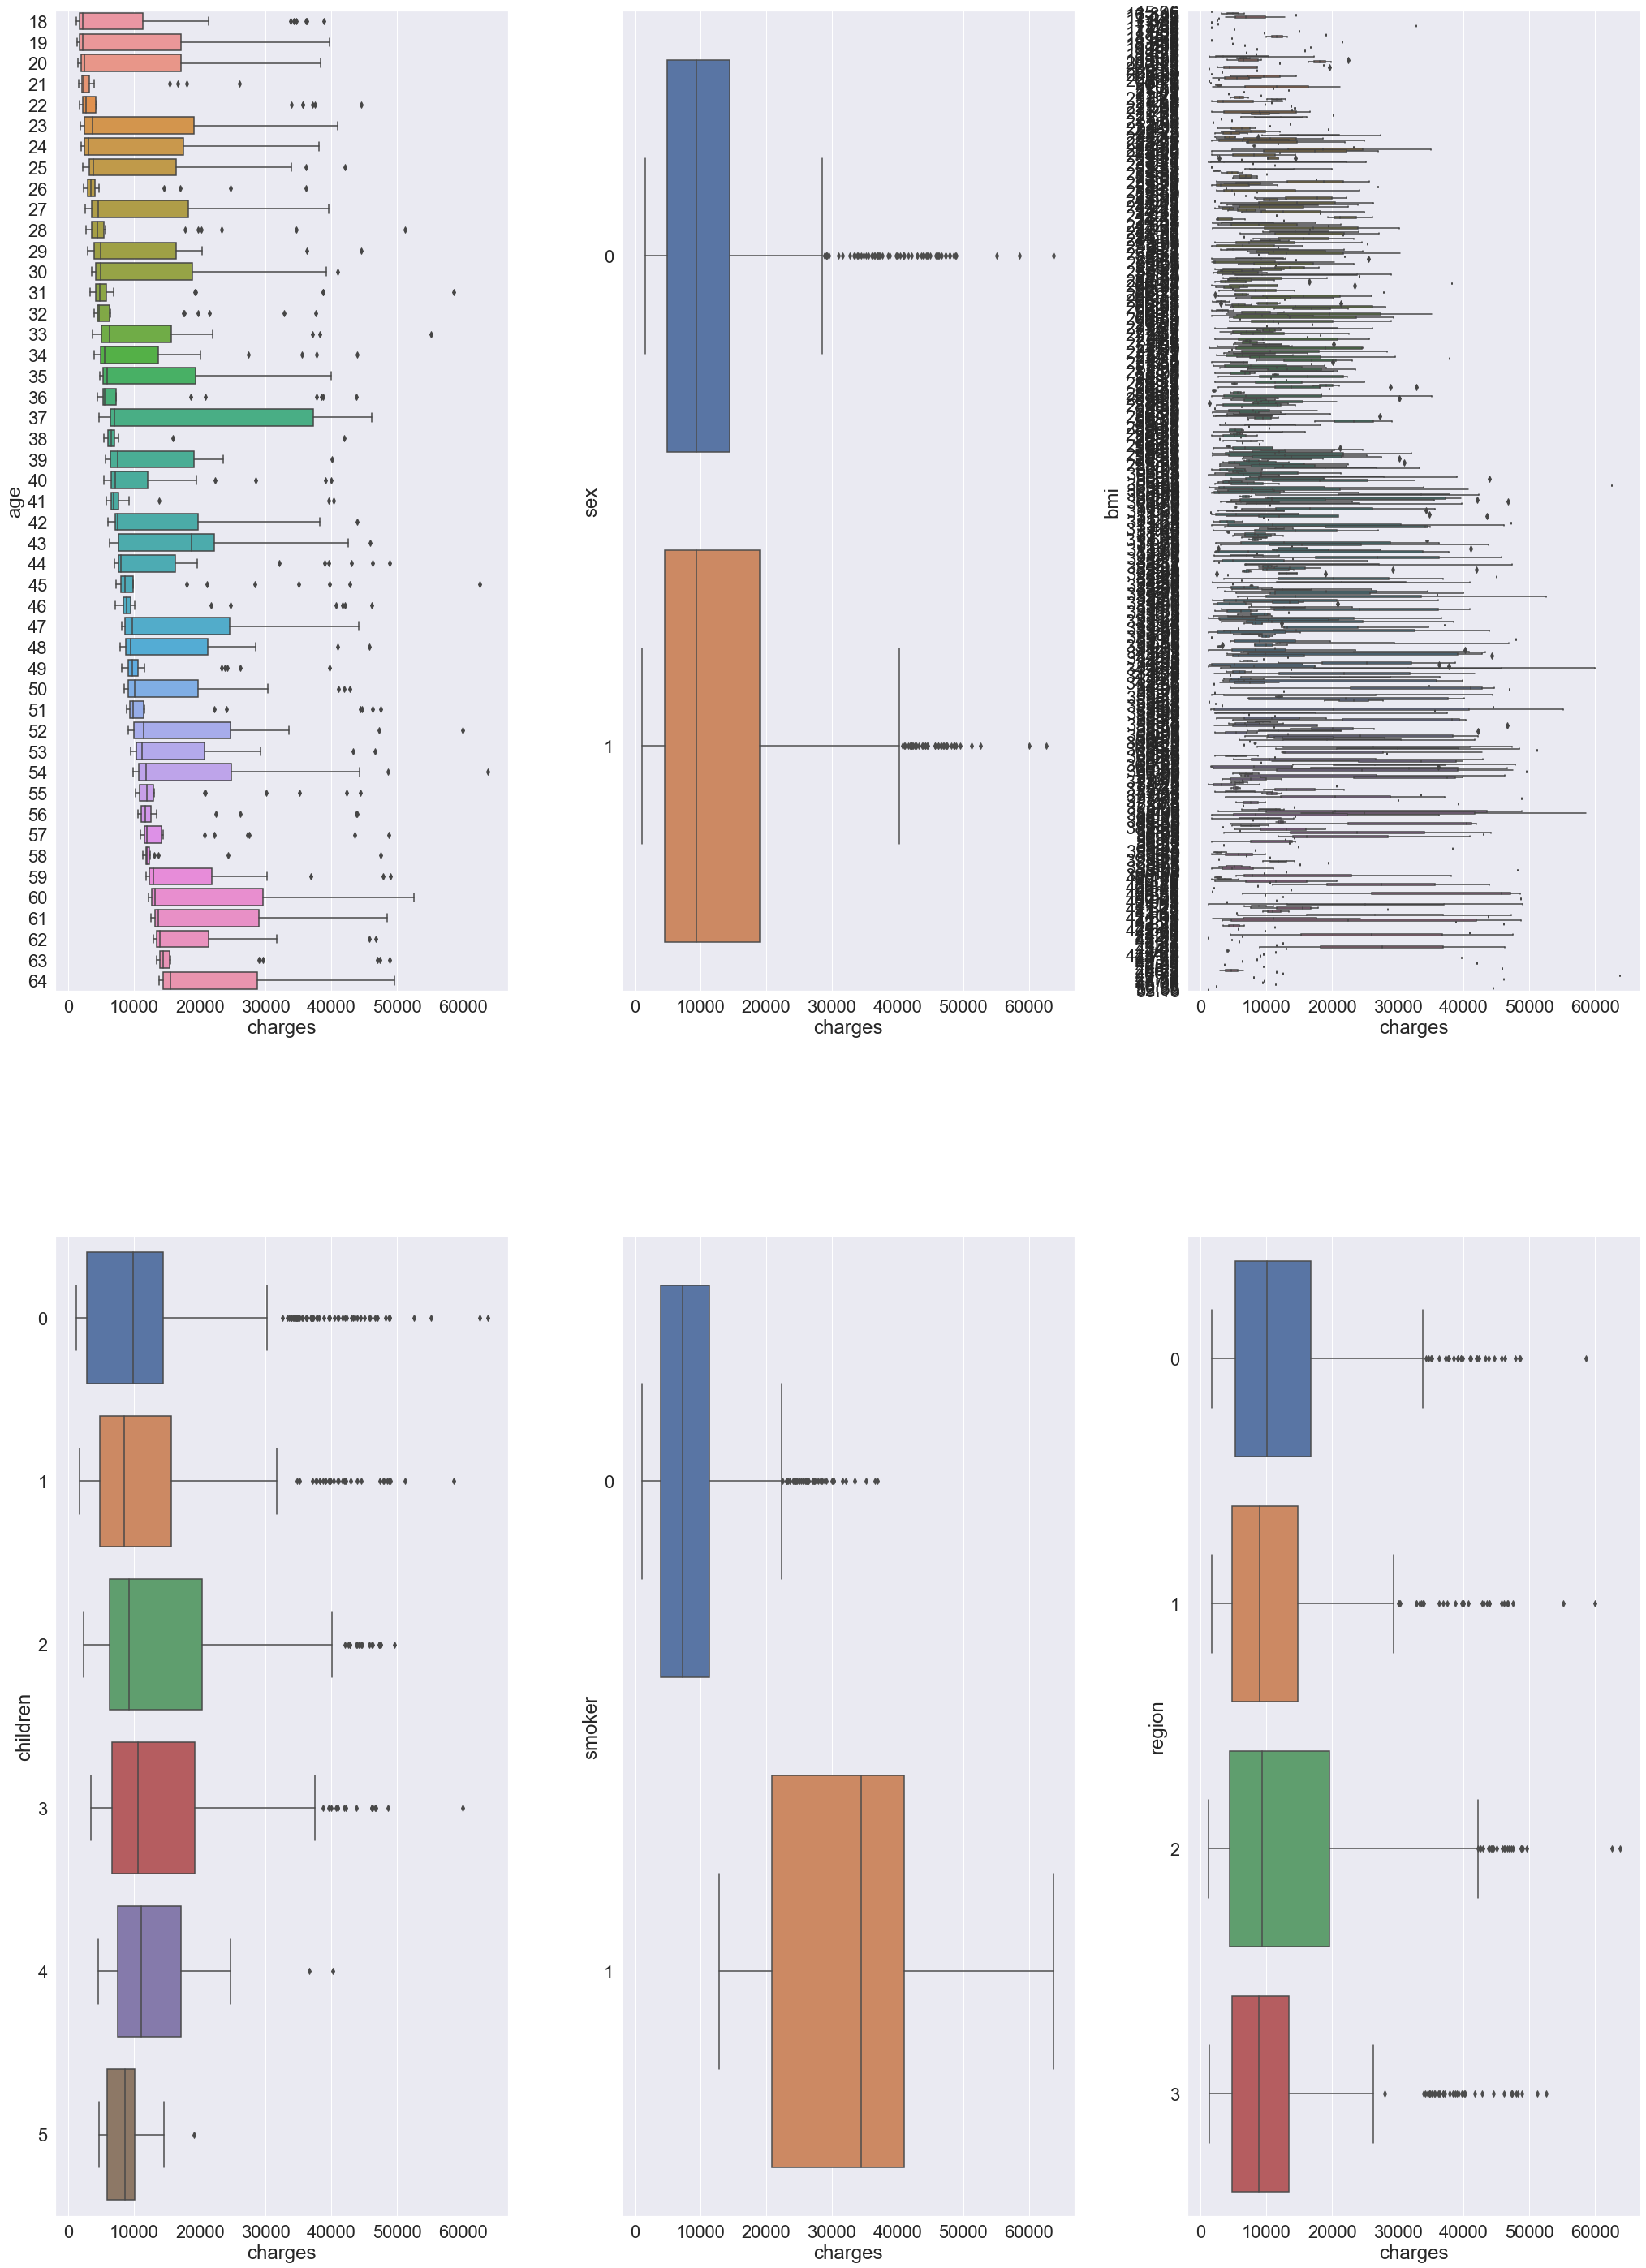

In [10]:
sns.set(font_scale=2)
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(35,50))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25,wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.boxplot(x='charges',y=i,data=ins,orient='h',ax=ax)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r,g,b))

for ax in axes_list:
    ax.remove()

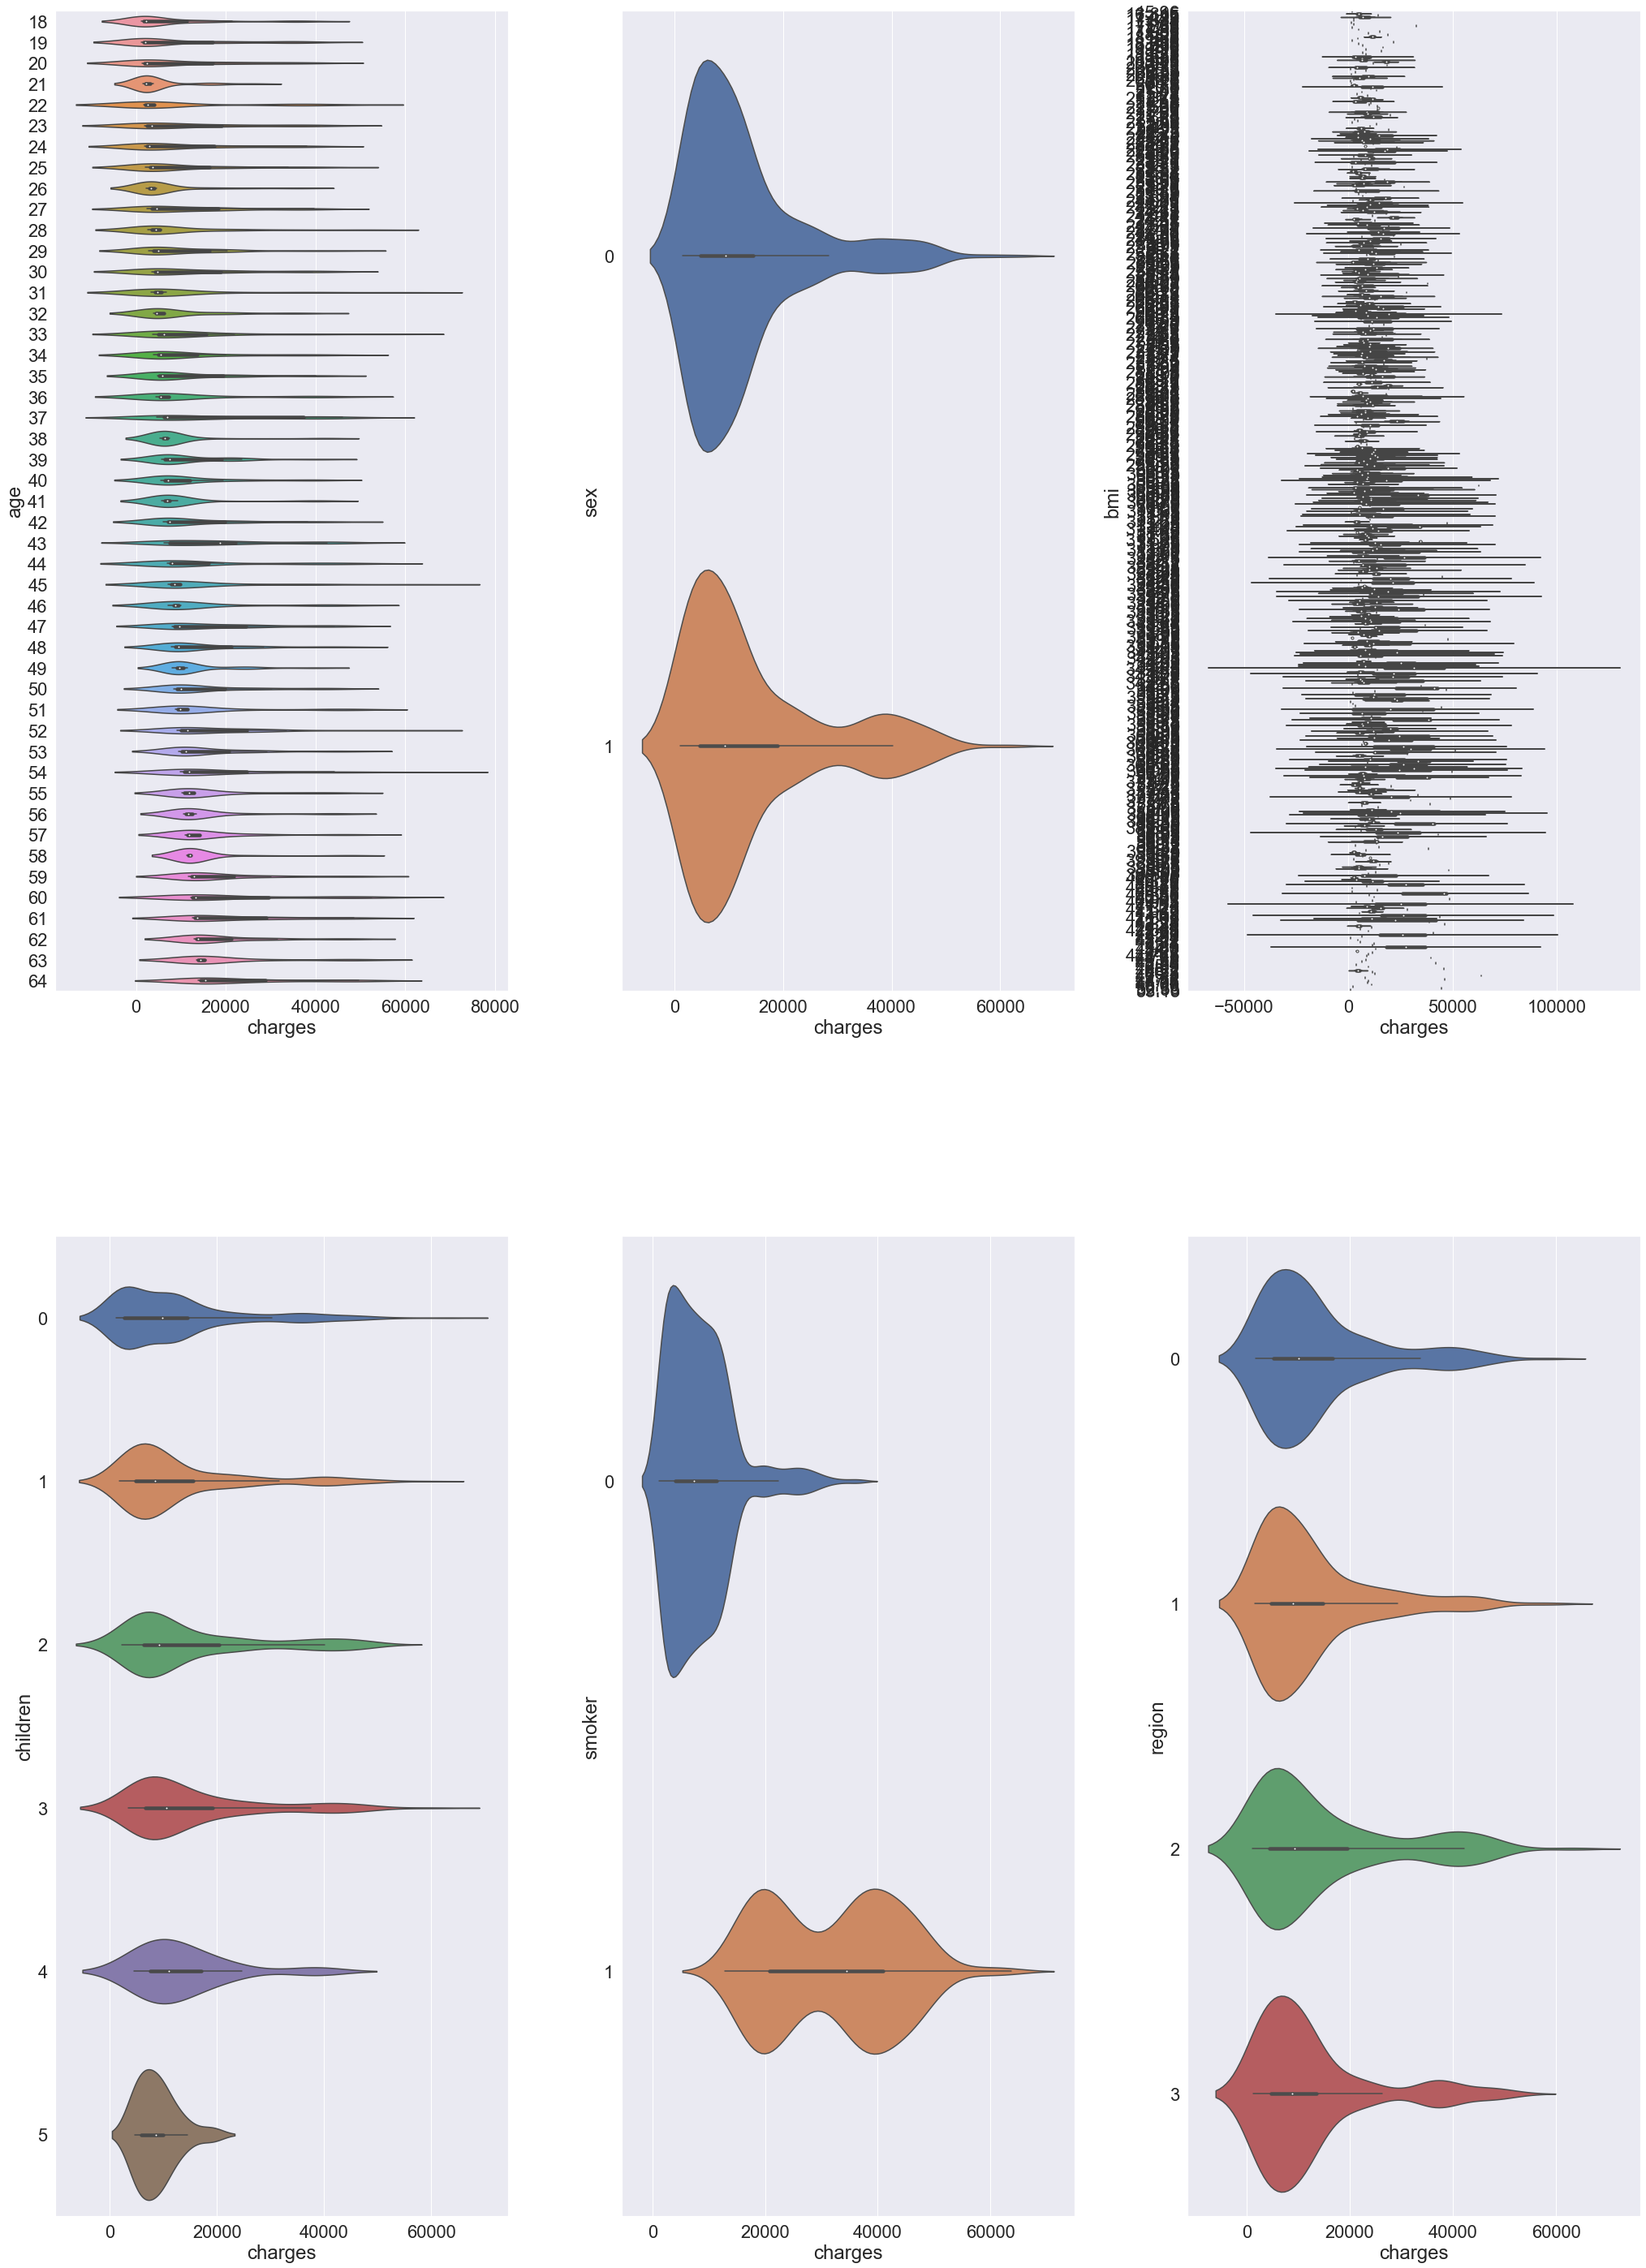

In [11]:
sns.set(font_scale=2)
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(35,50))
axes_list = [item for sublist in axes for item in sublist]
fig.subplots_adjust(hspace=0.25,wspace=0.25)

for i in feat:
    ax = axes_list.pop(0)
    sns.violinplot(x='charges',y=i,data=ins,orient='h',ax=ax)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r,g,b))

for ax in axes_list:
    ax.remove()

In [12]:
X = ins.drop(['charges'],axis=1)
y = ins['charges']

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [14]:
# Split the data, 80% training, 10% test, 10% validation
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_test, X_val, y_test, y_val = train_test_split(X_train,y_train,test_size=0.5,random_state=1)

### Decision Tree Regressor

In [15]:
# Try with mse
model = DecisionTreeRegressor(criterion='mse',random_state=0).fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 342422.6459329088
MAE: 35.778270747663555
r2_score: 0.9973968041979693


In [16]:
# Try with mae
model = DecisionTreeRegressor(criterion='mae',random_state=0).fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 342422.6459329088
MAE: 35.778270747663555
r2_score: 0.9973968041979693


### Random Forest Regressor

In [17]:
# Try with mse
model = RandomForestRegressor(n_estimators=25,criterion='mse',random_state=0).fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 4186668.9264136003
MAE: 1057.5607210859814
r2_score: 0.9681717342495283


In [18]:
# Try with mae
model = RandomForestRegressor(n_estimators=25,criterion='mae',random_state=0).fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 5008554.815927713
MAE: 1183.5901438377568
r2_score: 0.9619235204624337


In [19]:
# search for optimal number of estimators
i_scores = []

for i in range(10,100,20):
    RFR = RandomForestRegressor(n_estimators=i,random_state=0)
    scores = cross_val_score(RFR,X,y,cv=10)
    i_scores.append(scores.mean())

print(i_scores)
print('best i:',10+(np.asarray(i_scores,dtype=float)).argmax()*20)

[0.8188134603616287, 0.831674959455683, 0.8337130295088423, 0.8335937304452201, 0.8336317947621081]
best i: 50


In [20]:
# Best Model
model = RandomForestRegressor(n_estimators=50,criterion='mse',random_state=0).fit(X_train,y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 3606140.555611302
MAE: 1021.7016287386296
r2_score: 0.9725850785063459


### Support Vector Regressor

In [21]:
# Try poly
model = SVR(kernel='poly',gamma='auto').fit(X_train, y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 140920354.12904808
MAE: 7817.073942244395
r2_score: -0.07131721177487349


In [22]:
# Try rbf
model = SVR(kernel='rbf',gamma='auto').fit(X_train, y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 141539615.04988363
MAE: 7827.531787308407
r2_score: -0.07602501205802592


In [23]:
# Try Linear
model = SVR(kernel='linear',gamma='auto').fit(X_train, y_train)
score = model.score(X_test,y_test)
y_pred = model.predict(X_test)
print('MSE: ' + str(mean_squared_error(y_test, y_pred)))
print('MAE: ' + str(mean_absolute_error(y_test,y_pred)))
print('r2_score: '+str(r2_score(y_test, y_pred)))

MSE: 131117864.53309076
MAE: 7335.578411743556
r2_score: 0.0032041438326805283
